<a href="https://colab.research.google.com/github/jtlai0921/-/blob/master/labelme_json_to_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np
import os

In [ ]:
classes_name = ['bg', 'oil', 'scratch']
cls_map = {name: i for i, name in enumerate(classes_name)}
cls_map

{'bg': 0, 'oil': 1, 'scratch': 2}

In [ ]:
img_path = '/content/drive/My Drive/class/緯育AI瑕疵檢測/Day4/anno_tools/labelme/img/Scratch_1.jpg'
json_path = '/content/drive/My Drive/class/緯育AI瑕疵檢測/Day4/anno_tools/labelme/annotation/Scratch_1.json'

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


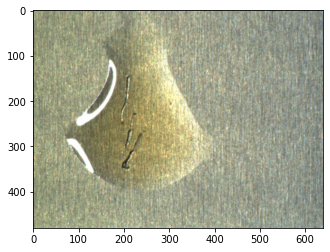

In [28]:
img = cv2.imread(img_path)[:,:,::-1]
plt.imshow(img)

In [29]:
data = json.load(open(json_path))

In [30]:
data

{'flags': {},
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDbjjVHAUsWMZUDPemvwI1m9MFRSs+y4ikyuVAUD2p10qS3ADYUBMqQOua4NEg1vcaYwtvJKWGOVI7VnMyqjMrnafT+VXLqQCyaIZ8wNjjuKpSOqwbCoBIByRVRuxlm0TfIJMMoVhnNJfy

In [31]:
height = data['imageHeight']
width = data['imageWidth']

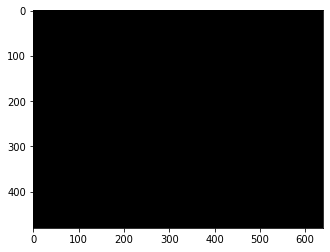

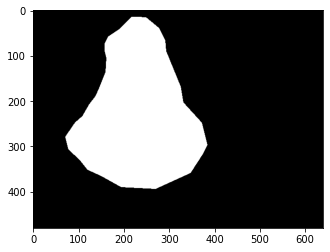

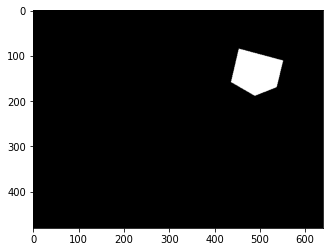

In [32]:
# Draw Object mask
mask = np.zeros((len(classes_name), height, width))
for shape in data['shapes']:
    cls_name = shape['label']
    cls_idx = cls_map[cls_name]
    points = shape['points']
    cv2.fillPoly(mask[cls_idx], np.array([points], dtype=np.int32), 255) # fill object with 255

for m in mask:
    plt.imshow(m, cmap='gray')
    plt.show()

In [33]:
# update backgroud mask
mask[0] = 255-np.max(mask[1:], axis=0)

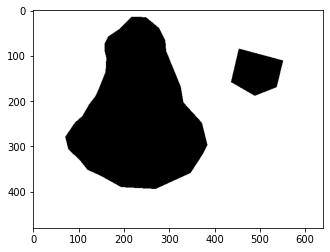

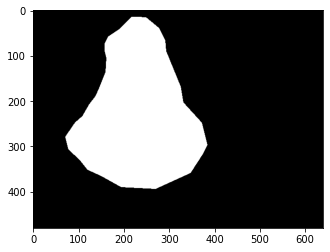

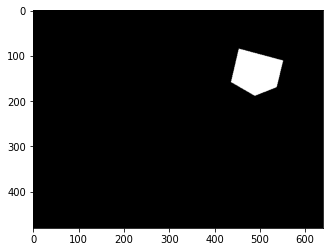

In [34]:
# show all masks
for m in mask:
    plt.imshow(m, cmap='gray')
    plt.show()

In [35]:
# Get File name
filename_img = os.path.split(img_path)[-1]
filename = filename_img.split('.')[0]
filename

'Scratch_1'

In [36]:
# Save Mask File
for i, m in enumerate(mask):
    path_save = os.path.join('/content/drive/My Drive', f'{filename}_mask_{i}.png')
    cv2.imwrite(path_save, m)